# Исследование рынка компьютерных игр

Для интернет-магазина компьютерных игр нужно выявить определяющие успешность игры закономерности. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Исследование необходимо для выбора потенциально популярного продукта и планирования рекламной кампании.

## План работы:
#### 01. Изучить общую информацию в файле с данными

#### 02. Подготовка данных
- Обработать пропуски и найти их причину
- Провести преобразование типов данных
- Изучить значение 'tbd'
- Посчитать суммарные продажи во всех регионах

#### 03. Провести исследовательский анализ данных
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Выберать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам.

#### 04. Составить портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### 05. Провести исследование статистических показателей
Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? 
- Посчитать: среднее количество, дисперсию, стандартное отклонение. 
- Построить гистограммы. 
- Описать распределения.

#### 06. Проверить гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

#### 07. Общий вывод


## Подключение необходимых библиотек

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : '#D9D9D9'}
sns.set(rc={'figure.figsize': (9, 6)}, font_scale=1.2)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 01. Изучение общей информации о данных:

### Описание данных
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы долларов)  
EU_sales — продажи в Европе (миллионы долларов)  
JP_sales — продажи в Японии (миллионы долларов)  
Other_sales — продажи в других странах (миллионы долларов)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация  определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

In [5]:
games = pd.read_csv('data/games.csv')
print(games.shape)
games.head(5)

(16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Некорректные типы данных в столбцах:
- Year_of_Release
- User_Score

Количество пропущенных значений

In [15]:
nan_counts = games.isnull().sum().sort_values(ascending=False)
print(nan_counts)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Genre                 2
Name                  2
Other_sales           0
JP_sales              0
EU_sales              0
NA_sales              0
Platform              0
dtype: int64


In [14]:
print("Пропуски присутствуют в столбцах:")

for i in range(len(nan_counts)):
    print("{}: {:.1%} от общего числа записей"\
          .format(nan_counts.index[i], nan_counts[i] / games.shape[0]))

Пропуски присутствуют в столбцах:
Critic_Score: 51.3% от общего числа записей
Rating: 40.5% от общего числа записей
User_Score: 40.1% от общего числа записей
Year_of_Release: 1.6% от общего числа записей
Genre: 0.0% от общего числа записей
Name: 0.0% от общего числа записей
Other_sales: 0.0% от общего числа записей
JP_sales: 0.0% от общего числа записей
EU_sales: 0.0% от общего числа записей
NA_sales: 0.0% от общего числа записей
Platform: 0.0% от общего числа записей


Градации возрастных категорий

In [7]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше;  
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.   
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.   
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше 
- "K-A" ("Kids to Adults") — Первоначальная версия рейтинга «E» («Everyone»)
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.  
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.  

## 02. Подготовка данных

### 02.01.  Приведение названий столбцов книжнему регистру

In [8]:
games = games.rename(columns={column_name: column_name.lower() for column_name in games.columns})
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 02.02. Преобразование типов данных

In [9]:
games["year_of_release"] = games["year_of_release"].astype("float64")
#games["user_score"] = games["user_score"].astype("float64")

При приведении столбца user_score к числовому типу возникает проблема со строковым значением "tbd". TDB - to be determined (англ. подлежит определению.

In [10]:
print("Записей со значением 'tbd' в столбце user_score:", games[games["user_score"] == "tbd"].shape[0])

Записей со значением 'tbd' в столбце user_score: 2424


Доход от игр c рейтингом tbd по регионам


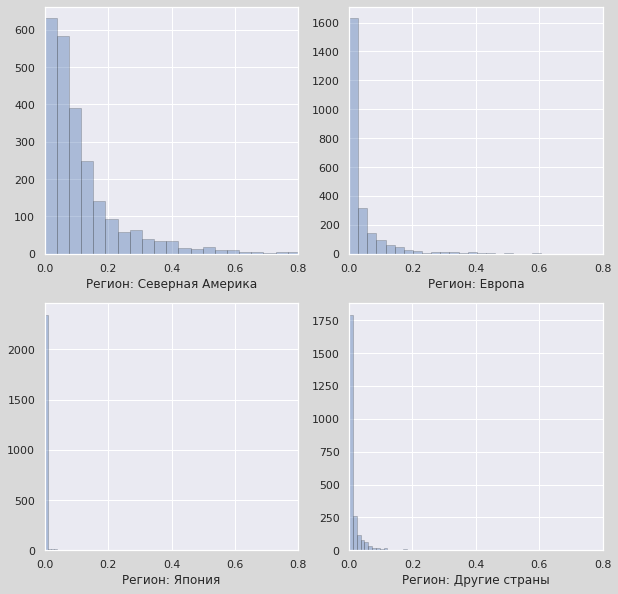

In [11]:
region_sales_array = dict({"na_sales" : "Северная Америка", 
                      "eu_sales" : "Европа", 
                      "jp_sales" : "Япония", 
                      "other_sales" : "Другие страны"})
print("Доход от игр c рейтингом tbd по регионам")
sns.set(rc={'figure.figsize': (10, 10)})
plot_number = 0
for region, region_rus in region_sales_array.items():
    plot_number += 1
    plt.subplot(2, 2, plot_number)
    sns.distplot(games.query('user_score == "tbd"')[region], kde=False, bins=90,
                 hist_kws=dict(edgecolor='k', linewidth=0.5),
                 axlabel=f'Регион: {region_rus}')
    plt.xlim(0, 0.8)


В основном доход таких игр не превышает 0.1 млн долларов (Северная Америка), видимо, игры были не слишком популярны. 
Для графиков и подсчетов все-таки удобнее было бы хранить данные о пользовательском рейтинге в цифрах. Мы можем заменить "tbd" на 0 -- пользователям не понравилась игра.

Заменим значение 'tbd' в столбце user_score на 0, затем приведем весь столбец к числовому типу

In [12]:
games['user_score'] = games['user_score']\
    .where(games['user_score'] != 'tbd', '0')\
    .astype("float64")

### 02.03. Добавление столбца с суммарными продажами во всех регионах

In [13]:
games['all_sales'] = (games['na_sales'] + 
                        games['eu_sales'] +
                        games['jp_sales'] + 
                        games['other_sales'])

games_sales = games[["name", 
                     "na_sales", 
                     "eu_sales",
                     "jp_sales", 
                     "other_sales", 
                     "all_sales"]]
games_sales.head()

,name,na_sales,eu_sales,jp_sales,other_sales,all_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


### 02.04. Обработка пропусков

In [14]:
print(nan_counts)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Genre                 2
Name                  2
Other_sales           0
JP_sales              0
EU_sales              0
NA_sales              0
Platform              0
dtype: int64


Выдвинем гипотезу о том, что игры у которых пропущены значения оценок, имели плохие продажи в мире.

In [15]:
games.sort_values("all_sales", ascending=True).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.0,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN,0.00
16181,Sakura Sakura: Haru Urara,PSP,2010.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.0,65.0,NaN,RP,0.01
16179,Pro Angler Moves,PS3,2012.0,Sports,0.01,0.00,0.00,0.0,NaN,0.0,E,0.01
16178,Egg Mania: Eggstreme Madness,XB,2002.0,Puzzle,0.01,0.00,0.00,0.0,58.0,0.0,E,0.01
16177,Destiny Links,DS,2009.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16176,Fab 5 Soccer,DS,2008.0,Sports,0.01,0.00,0.00,0.0,NaN,0.0,E,0.01
16175,Psycho-Pass,XOne,2014.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16174,50 Classic Games,3DS,2012.0,Misc,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01


Оставим пропуски без замены

## 03. Исследовательский анализ

### 03.01 Определить актуальный период для данных, с помощью которых можно будет построить прогноз на 2017

In [16]:
platforms_sales = games.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platforms_sales.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем платформы, у которых были продажи больше 80 млн.

In [17]:
platforms_sales = platforms_sales.query('all_sales > 80')

In [18]:
successed_games = games.query('platform in @platforms_sales.index')

In [19]:
years = games.pivot_table(index='year_of_release', values=['name'], aggfunc='count')
years.reset_index(inplace=True)
years.columns = ['year_of_release', 'quantity']

Выведем графики

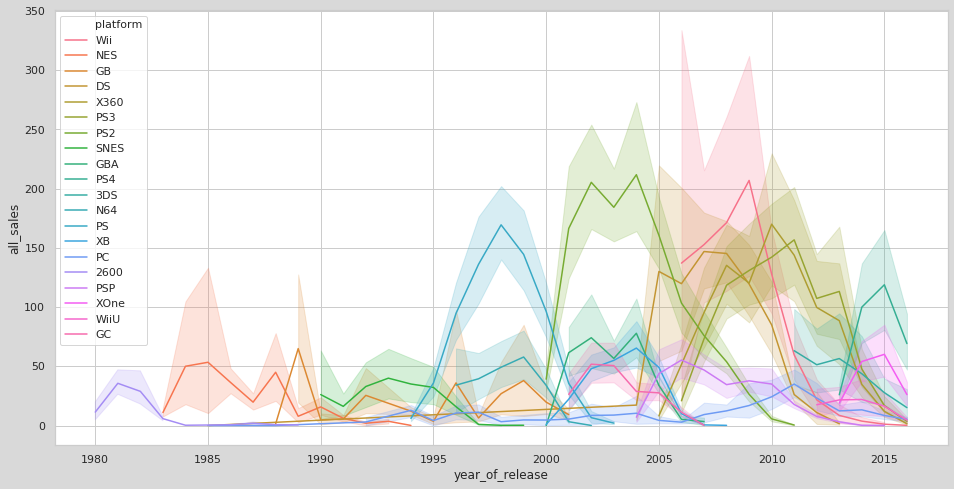

In [22]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games, estimator=sum))
plt.show()

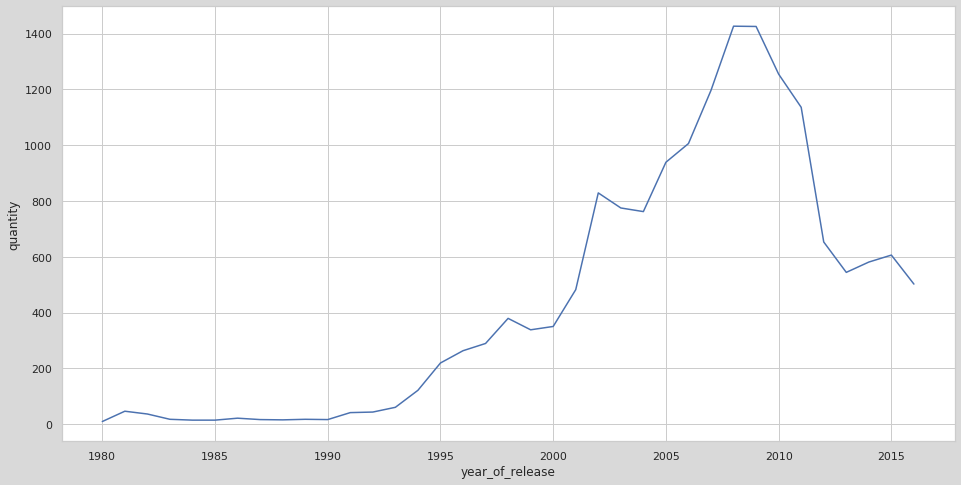

In [23]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.lineplot(x="year_of_release", y="quantity", data=years)
plt.show()

После примерно 2009 производство игр, начало резко падать. Возможно это связано с тем, что всю большую популярность получили игры, которые не требуют игры на какой-то платформе: игры, в которые можно играть с телефона, компьютера.  
Рассмотрим некоторые фрагменты графика с платформами, чтобы лучше понять их жизненный цикл и выбрать актуальный для нас период.

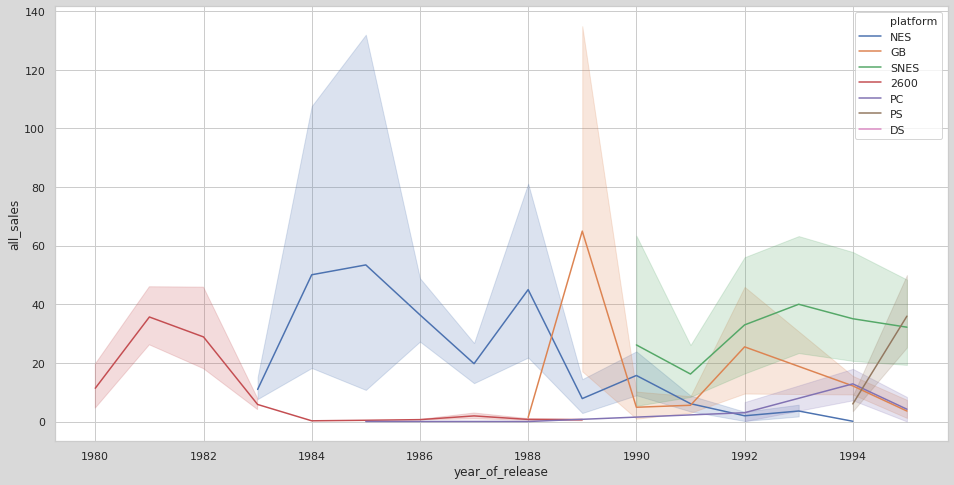

In [24]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('year_of_release <= 1995'), estimator=sum))
plt.show()

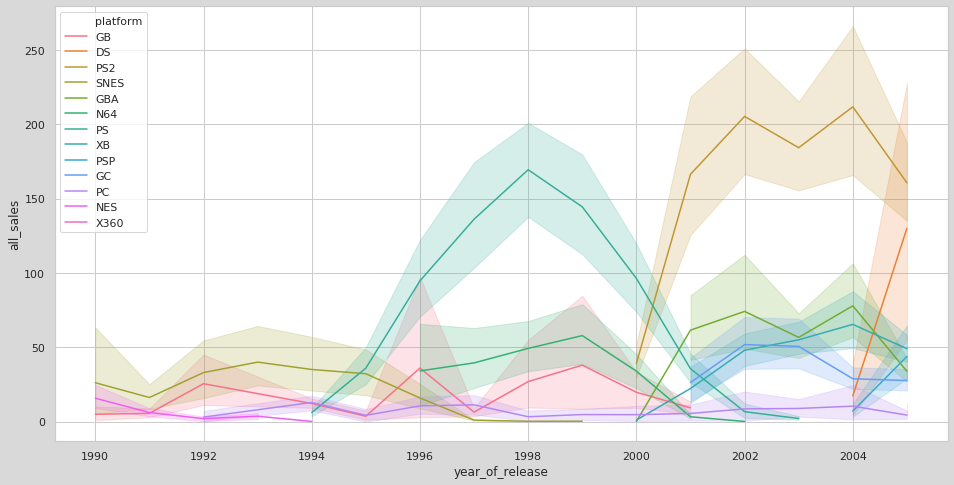

In [25]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('1990 <= year_of_release <= 2005'), estimator=sum))
plt.show()

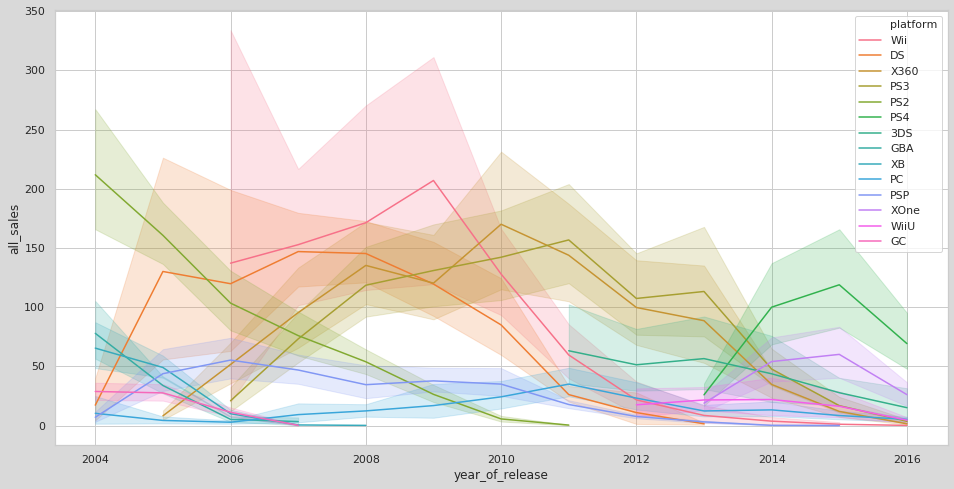

In [29]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('2004 <= year_of_release <= 2016'), estimator=sum))
plt.show()

8, 10, 12 лет -- примерно так живут платформы. Как правило, это графики-горки с набором объемов продаж, а затем и спадом. Судя по графику количества выпускаемых игр в год, произошло резкое падение количества игр с 2009 по 2013 год. За это время ушли ps2, ps3, ps4, ds, wii. В качестве периода, на основании которго нужно будет строить прогноз на 2017 год, возьмем отрезок с 2014 года включительно. Это точка после которой закончился резкий спад выпуска игр (хотя возможно так или иначе он продолжается), примерно к этому году пришли к спаду многие платформы и началось развитие нескольких других (ps4, Xone)

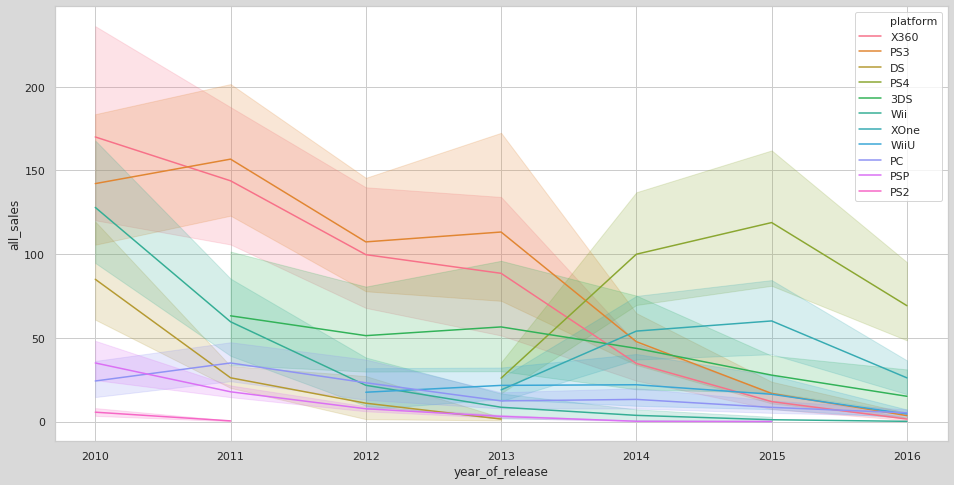

In [30]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('2010 <= year_of_release <= 2016'), estimator=sum))
plt.show()

### 03.02.  Выделить потенциально прибыльные платформы и исследовать продажи

In [34]:
actual_games = games.query('year_of_release >= 2014')
grouped_platforms = actual_games.pivot_table(index=['platform'], values='all_sales', aggfunc='sum')
grouped_platforms.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Еще раз посмотрим на график продаж по платформам с 2010 по 2016 год. Видно, что к 2016 году, окончательно ушло большое количество платформ, появившихся новых всего две, и продажи по ним уже тоже перевалили пик. Судя по тенденциям графика платформы-продажи предыдущих периодов, в таком состоянии в 2017 году может появиться новый игрок. Судя по графику, даже новых игроков 2013 года сложно назвать потенциально прибыльными. ps4, XOne - новые платформы, которые возможно уже пережили свой пик, 3DS - уже в стадии ухода. Тем не менее, придется считать их наиболее перспективными.

Посмотрим на продажи поигрово для перспективных (ps4, XOne, 3DS), сгруппированные по платформам:

In [36]:
perspective_platforms = actual_games[actual_games['platform'].isin(['PS4', 'XOne', '3DS'])]

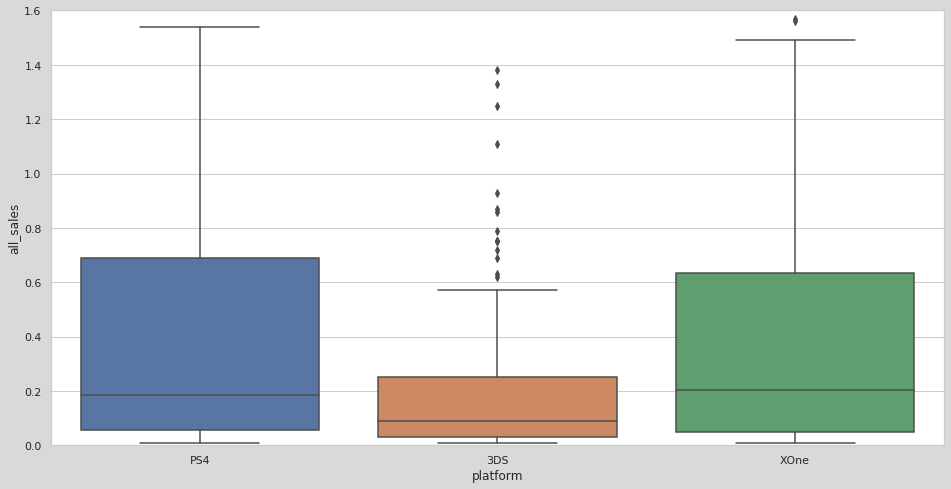

In [43]:
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='all_sales', data=perspective_platforms).set(ylim=(0, 1.6))
plt.show()

In [38]:
perspective_platforms.pivot_table(index='platform', values='all_sales',
                                  aggfunc=['mean', 'median', 'count'])

,mean,median,count
,all_sales,all_sales,all_sales
platform,,,
3DS,0.408868,0.090,212
PS4,0.766356,0.185,376
XOne,0.615614,0.205,228


Самые большые выбросы у ps4, что вобщем логично, на этой платформе и игр больше, и тут может быть, что одна, две игры продающие, продажи от какой-то даже привысили 14 миллионов (внизу показаны эти игры). 3ds - уходящая платформа, у нее и меньше средняя продажа и продажи самых успешных игр не превышают 4 млн. Если представить то, что игры могут выходить на всех трех платформах, то ps4 судя по графику и средним продажам самая успешная, далее xOne -- средние продажи у них не сильно отличаются, но у ps4 есть свои игры "звезды", которые в итоге и делают большую прибыли в совокупности по всей платформе.

In [39]:
popular_games = (perspective_platforms[perspective_platforms['all_sales'] > 6]
                 .sort_values(by='all_sales', ascending=False))
popular_games[['name','platform', 'genre', 'all_sales']]

,name,platform,genre,all_sales
31,Call of Duty: Black Ops 3,PS4,Shooter,14.63
42,Grand Theft Auto V,PS4,Action,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,11.68
77,FIFA 16,PS4,Sports,8.58
87,Star Wars Battlefront (2015),PS4,Shooter,7.98
92,Call of Duty: Advanced Warfare,PS4,Shooter,7.66
94,FIFA 17,PS4,Sports,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,Fighting,7.55
99,Call of Duty: Black Ops 3,XOne,Shooter,7.39
105,Fallout 4,PS4,Role-Playing,7.17


### 03.03. Рассмотреть влияние отзывов пользователей на продажи внутри одной платформы
Возьмем данные пл перспективным платформам, очистим от выбросов, построим графики корреляции продаж с оценками критиков и зрителей

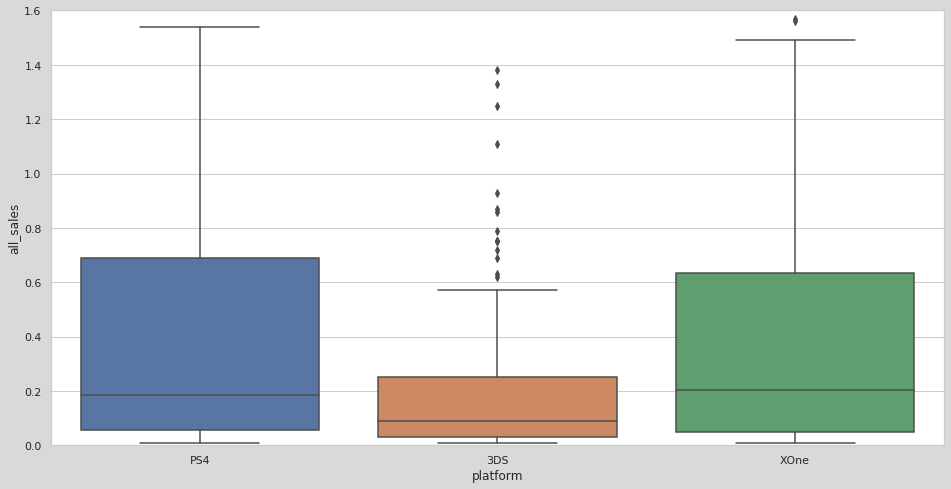

In [42]:
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='all_sales', data=perspective_platforms).set(ylim=(0, 1.6))
plt.show()

#### 03.03.01 PS4

Не будем учитывать выбросы, для ps4 - это продажи выше 1.55 млн

In [46]:
prepared_ps4 = (perspective_platforms[(perspective_platforms['platform'] =='PS4') &
                                           (perspective_platforms['all_sales'] <= 1.55)])
len(prepared_ps4)

323

Основная доля продаж на платформе ps4 приходится на суммы в пределах 0.1 млн. Построим графики корреляции для очищенной и неочищенной таблицы

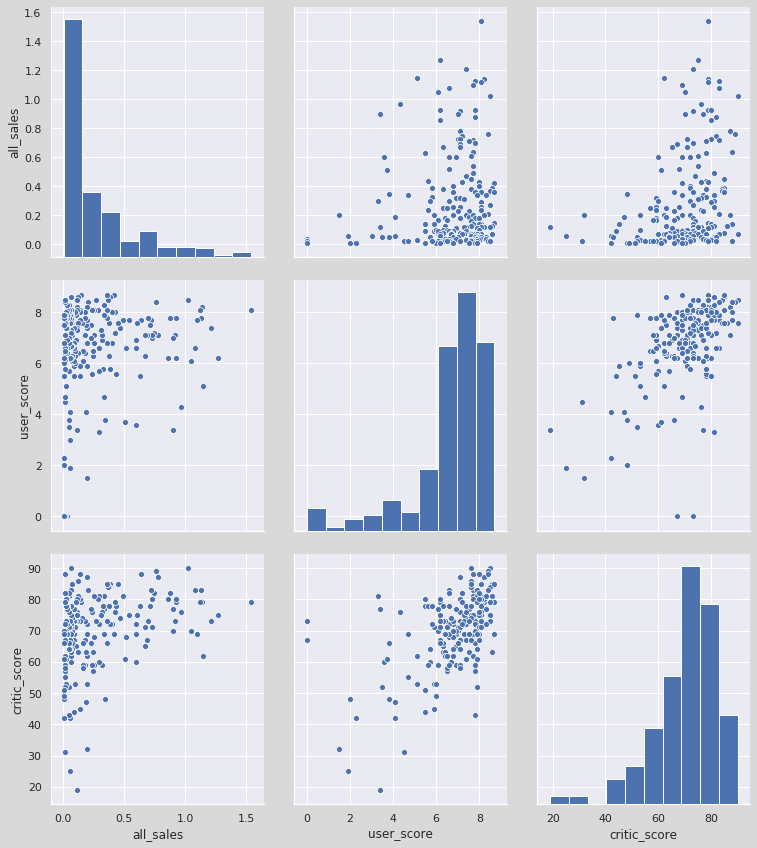

In [49]:
sns.pairplot(prepared_ps4, height=4, aspect=.9, vars=["all_sales", "user_score", "critic_score"])
plt.show()

In [50]:
prepared_ps4['all_sales'].corr(prepared_ps4['user_score'])

0.12816127427521642

In [51]:
prepared_ps4['all_sales'].corr(prepared_ps4['critic_score'])

0.31430480777798225

Отзывы пользователей для платформы в основном больше 5, тем не менее, наибольшая концентрация на графике приходится в области продаж до 0.2 млн. С рейтингом критиков примерно такая же ситуация.

#### 03.03.01.01 PS4 - хвост

In [52]:
tail_ps4 = (perspective_platforms[(perspective_platforms['platform'] =='PS4') &
                                           (perspective_platforms['all_sales'] >= 3)])
len(tail_ps4)

25

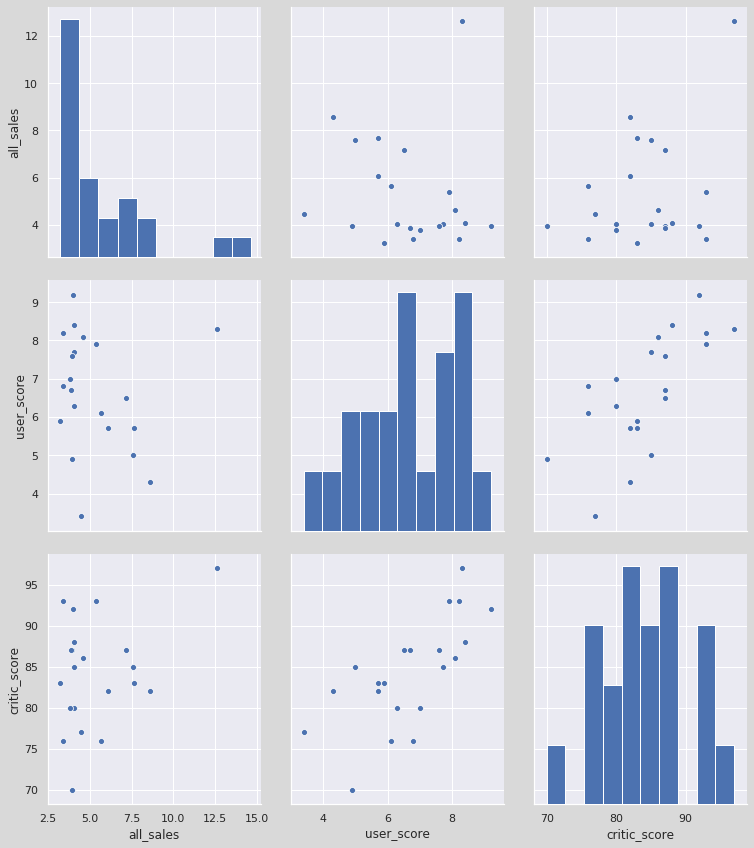

In [54]:
sns.pairplot(tail_ps4, height=4, aspect=.9,
             vars=["all_sales", "user_score", "critic_score"])
plt.show()

In [55]:
tail_ps4['all_sales'].corr(tail_ps4['user_score'])

-0.12495760950797054

In [56]:
tail_ps4['all_sales'].corr(tail_ps4['critic_score'])

0.33148760796174614

Для звездных игр на ps4 распределение отзывов пользователей уже не так скошено в высокие оценки, и оценки критиков распределены равномерно. По-прежнему сложно сказать что-то о явном влиянии оценок критиков и пользователей на продажи.

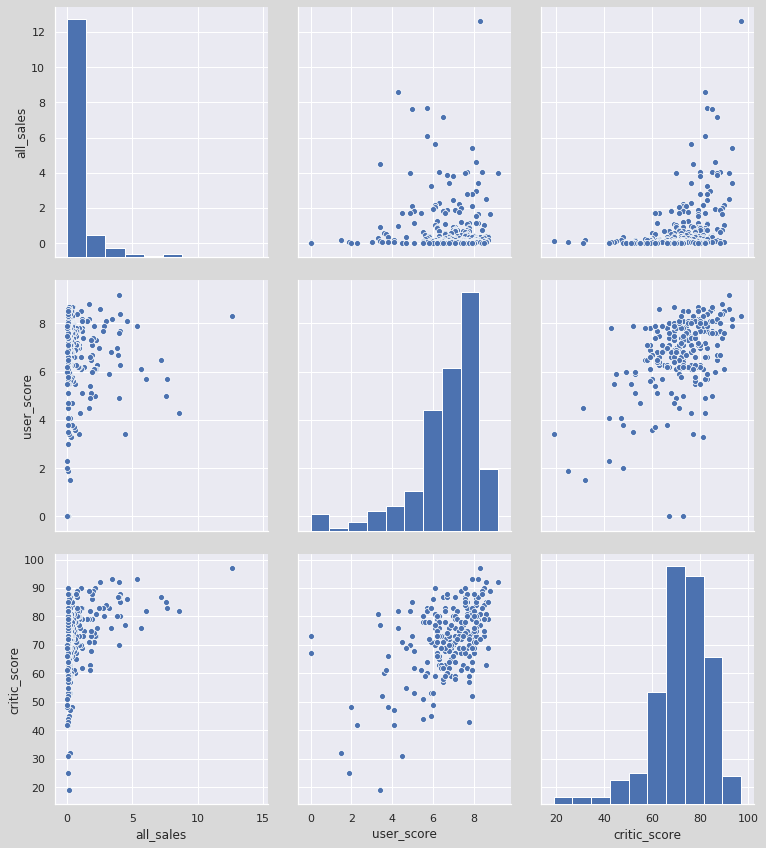

In [58]:
all_ps4 = (perspective_platforms[(perspective_platforms['platform'] =='PS4')])
sns.pairplot(all_ps4, height=4, aspect=.9,
              vars=["all_sales", "user_score", "critic_score"])
plt.show()

#### 03.03.02 XOne

In [59]:
cleared_XOne = (perspective_platforms[(perspective_platforms['platform'] =='XOne') &
                                           (perspective_platforms['all_sales'] <+ 1.5)])

Здесь тоже продажи приходятся в основном по 0.1 млн

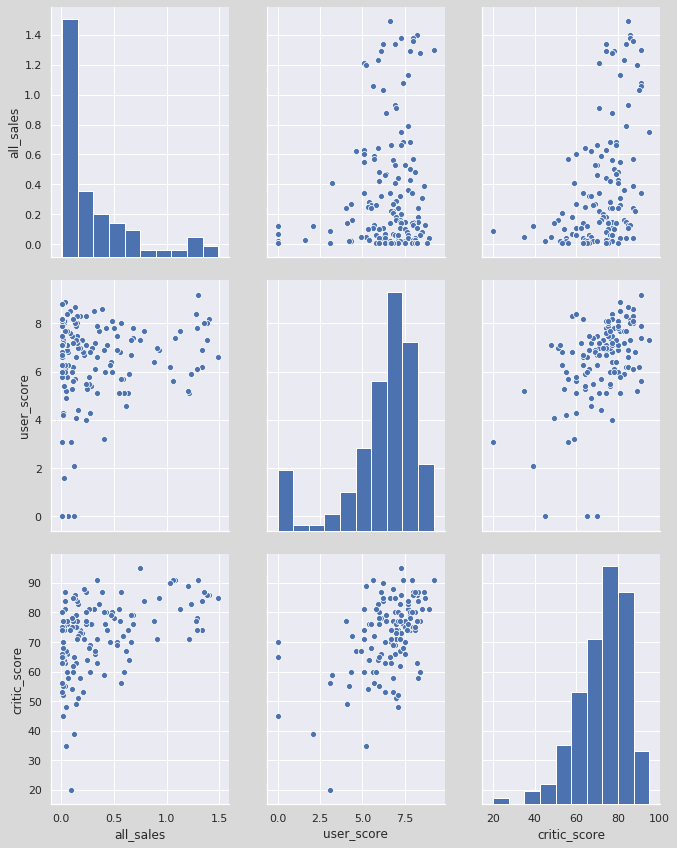

In [65]:
sns.pairplot(cleared_XOne, height=4, aspect=.8,
             vars=["all_sales", "user_score", "critic_score"])
plt.show()

In [61]:
cleared_XOne['all_sales'].corr(cleared_XOne['user_score'])

0.21384546350314335

In [62]:
cleared_XOne['all_sales'].corr(cleared_XOne['critic_score'])

0.44858649637186604

#### 03.03.03 3DS

In [63]:
cleared_3DS = (perspective_platforms[(perspective_platforms['platform'] =='3DS') &
                                           (perspective_platforms['all_sales'] < 0.6)])

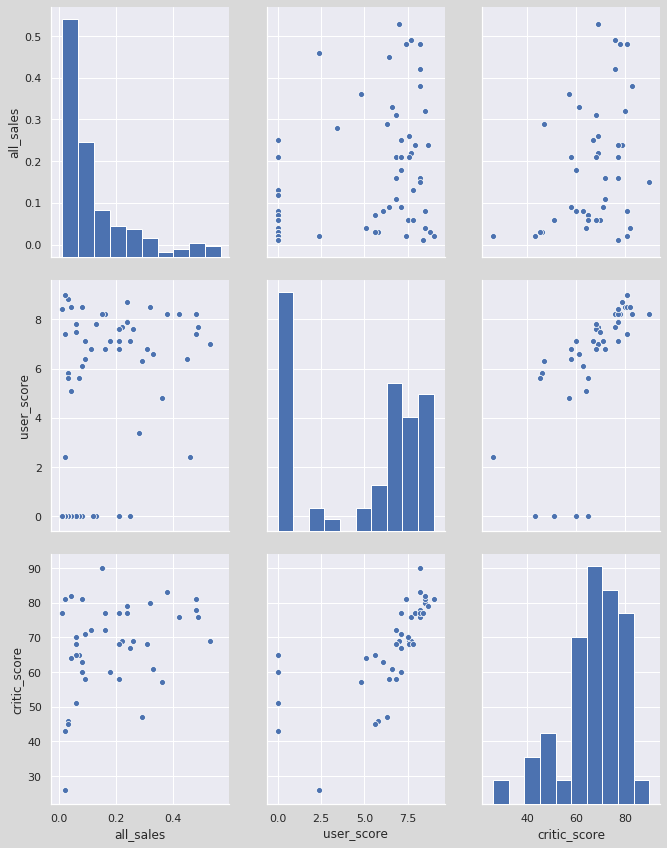

In [64]:
sns.pairplot(cleared_3DS, height=4, aspect=.8,
             vars=["all_sales", "user_score", "critic_score"])
plt.show()

In [66]:
cleared_3DS['all_sales'].corr(cleared_3DS['critic_score'])

0.33369448755844106

In [67]:
cleared_3DS['all_sales'].corr(cleared_3DS['user_score'])

0.41065628925587416

Для 3ds видна полоска с рейтингом пользователей 0, видимо это тот самый результат обработки tbd. Для всех платформ основная сумма продажи 0.1, продажи не имеют убедительной кореляции с рейтингами. Однако для ps4 и Xone рейтинги критиков более влиятельные, чем пользователей. Возможно рейтинги вообще появляются позднее (как минимум пользователей), когда уже успевают в нее поиграть и, следовательно, купить. И возможно, игры, вышедшие давно, покупает гораздо меньше людей, чем только когда они выходят, поэтому невозможно оценить влияние рейтинга

### 03.04. Исследование жанров
Посмотреть на распределение игр по жанрам, жанрам с высокими и низкими продажами.

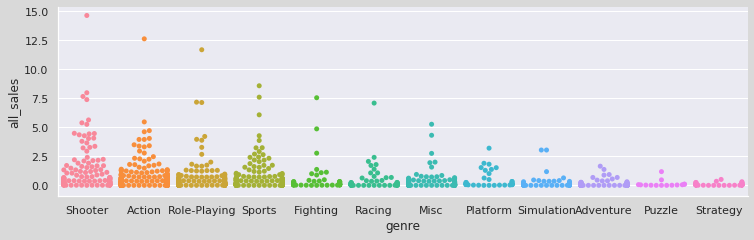

In [69]:
sns.catplot(y="all_sales", x="genre", kind="swarm",
            height=3.5, aspect=3,
            data=actual_games)
plt.show()

Выделяется группа игр с высоким доходом: shooter, action, role-playing, sports. Продажы от каждой игры здесь держаться в основном диапазоне до 2 миллионов.
Посмотрим, сколько ссуммарно приносят жанры, каковы медианные значения продаж одной игры, количество выпускаемых игр по жанрам.



In [70]:
genre_grouped = (actual_games
                 .pivot_table(index='genre', values=['all_sales'],
                              aggfunc=['median', 'mean', 'count', 'sum']))
genre_grouped.columns = ['median_sales', 'mean_sales','genre_count', 'sum_sales']
genre_grouped.sort_values(by='median_sales', ascending=False)

,median_sales,mean_sales,genre_count,sum_sales
genre,,,,
Shooter,0.515,1.335469,128,170.94
Sports,0.180,0.680000,161,109.48
Platform,0.140,0.476053,38,18.09
Fighting,0.125,0.470333,60,28.22
Role-Playing,0.110,0.459005,221,101.44
Simulation,0.100,0.298409,44,13.13
Action,0.090,0.322068,619,199.36
Misc,0.090,0.332301,113,37.55
Racing,0.090,0.398841,69,27.52


Самые прибыльные игры - шутеры. Их меньше производится, но медианная продажа у них самая высокая (и средняя тоже из-за выбросов). Затем идут жанры sports, platform (разновидность экшена), fighting, role-playing.
puzzle и adventure -- самые малоприбыльные.

## 04. Составить портрет пользователя каждого региона
для каждого региона (NA, EU, JP)

Создадим функцию для печати графика и сводной таблицы

In [77]:
def list_popular(parametr, region_sales):
    print('Распределение: ', parametr, 'по', region_sales )
    g = (sns.catplot(y=region_sales, x=parametr, kind="swarm", height=4, aspect=3,
                     data=actual_games.sort_values(by=region_sales, ascending=False)))
    (g.set_axis_labels(parametr, region_sales).set_titles('Title'))
    plt.show()

    print('Самые популярные 5 игр по:', parametr, 'для', region_sales )
    print('-'*47)
     
    print(actual_games
     .pivot_table(index=parametr, values=region_sales,
                  aggfunc=['mean', 'median', 'count', 'sum'])
     .sort_values(by=( 'sum', region_sales), ascending=False))
    print('')
    print('')
    print('-'*100)
    print('')
    print('')

### 04.01. Самые популярные платформы (топ-5)

Распределение:  platform по na_sales


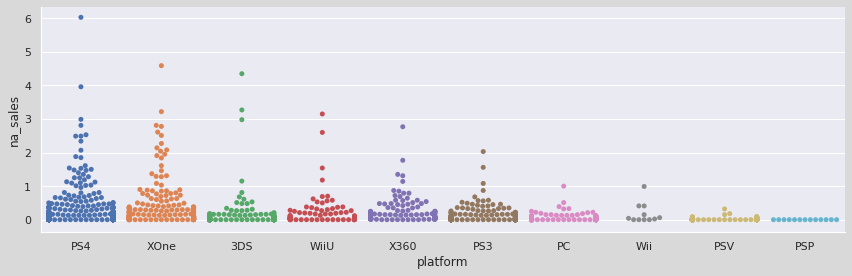

Самые популярные 5 игр по: platform для na_sales
-----------------------------------------------
              mean   median    count      sum
          na_sales na_sales na_sales na_sales
platform                                     
PS4       0.262261     0.05      376    98.61
XOne      0.356447     0.10      228    81.27
X360      0.254955     0.10      111    28.30
3DS       0.106792     0.00      212    22.64
PS3       0.100685     0.02      219    22.05
WiiU      0.265205     0.09       73    19.36
PC        0.047881     0.00      151     7.23
PSV       0.008542     0.00      295     2.52
Wii       0.189091     0.04       11     2.08
PSP       0.000000     0.00       13     0.00


----------------------------------------------------------------------------------------------------


Распределение:  platform по eu_sales


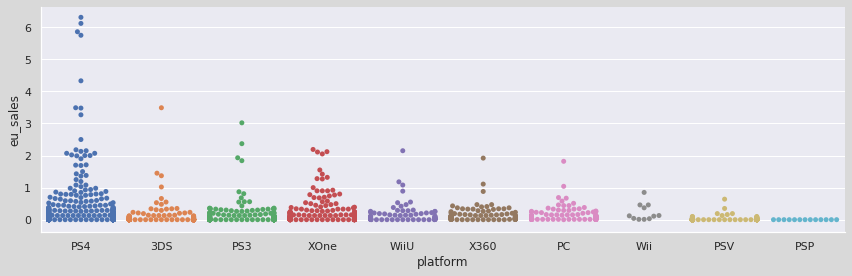

Самые популярные 5 игр по: platform для eu_sales
-----------------------------------------------
              mean   median    count      sum
          eu_sales eu_sales eu_sales eu_sales
platform                                     
PS4       0.345851     0.07      376   130.04
XOne      0.202851     0.07      228    46.25
PS3       0.116621     0.01      219    25.54
PC        0.119007     0.05      151    17.97
3DS       0.076038     0.00      212    16.12
X360      0.139550     0.05      111    15.49
WiiU      0.180137     0.06       73    13.15
PSV       0.011966     0.00      295     3.53
Wii       0.235455     0.12       11     2.59
PSP       0.000000     0.00       13     0.00


----------------------------------------------------------------------------------------------------


Распределение:  platform по jp_sales


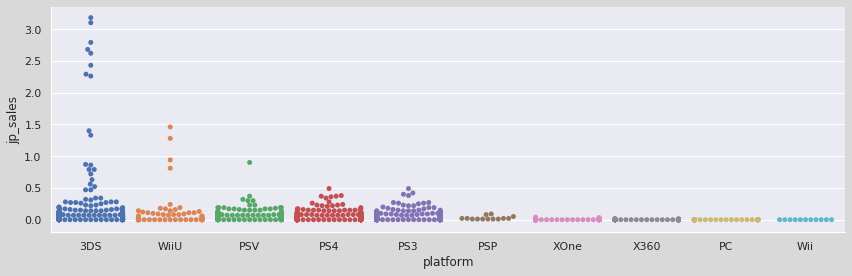

Самые популярные 5 игр по: platform для jp_sales
-----------------------------------------------
              mean   median    count      sum
          jp_sales jp_sales jp_sales jp_sales
platform                                     
3DS       0.208679    0.055      212    44.24
PS4       0.039947    0.015      376    15.02
PSV       0.049288    0.030      295    14.54
PS3       0.051233    0.020      219    11.22
WiiU      0.100137    0.010       73     7.31
PSP       0.027692    0.020       13     0.36
XOne      0.001404    0.000      228     0.32
X360      0.000721    0.000      111     0.08
PC        0.000000    0.000      151     0.00
Wii       0.000000    0.000       11     0.00


----------------------------------------------------------------------------------------------------




In [78]:
reg_popular_platforms = [('platform', 'na_sales'), ('platform', 'eu_sales'), ('platform', 'jp_sales')]
for pair in reg_popular_platforms:
    list_popular(*pair)

Японский рынок отличается отстуствием лидерства ps4, хотя на североамериканском и европейском рынках у нее значительное лидерство. В Японии популярнее платформа Nintendo 3ds (ведь она японского производства!), далее идет ps. PS4 доминирует в Европе. В Северной Америке так же популярен xbox.

### 04.02. Самые популярные жанры (топ-5)

Распределение:  genre по na_sales


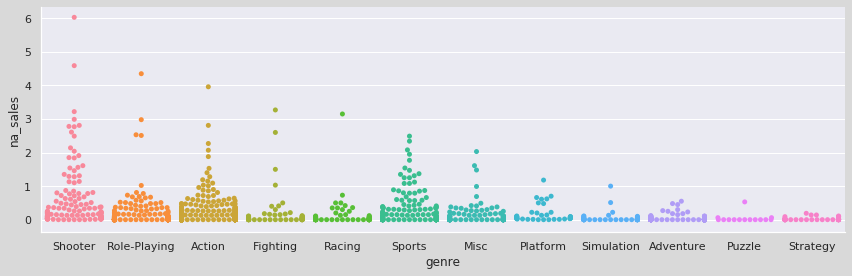

Самые популярные 5 игр по: genre для na_sales
-----------------------------------------------
                  mean   median    count      sum
              na_sales na_sales na_sales na_sales
genre                                            
Shooter       0.617344    0.220      128    79.02
Action        0.117173    0.010      619    72.53
Sports        0.286522    0.070      161    46.13
Role-Playing  0.151448    0.020      221    33.47
Misc          0.133186    0.010      113    15.05
Fighting      0.207167    0.040       60    12.43
Racing        0.126667    0.030       69     8.74
Platform      0.178684    0.075       38     6.79
Adventure     0.030486    0.000      185     5.64
Simulation    0.059773    0.000       44     2.63
Strategy      0.026486    0.000       37     0.98
Puzzle        0.046429    0.000       14     0.65


----------------------------------------------------------------------------------------------------


Распределение:  genre по eu_sales


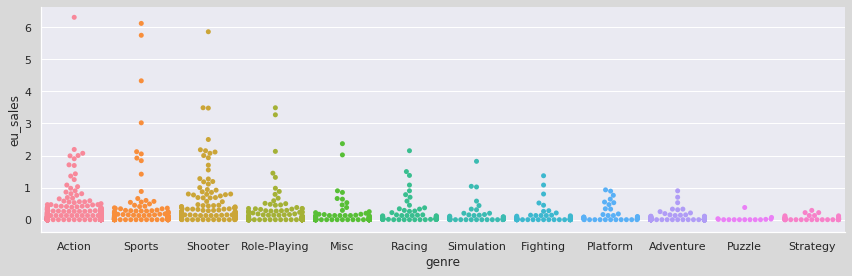

Самые популярные 5 игр по: genre для eu_sales
-----------------------------------------------
                  mean   median    count      sum
              eu_sales eu_sales eu_sales eu_sales
genre                                            
Action        0.120646    0.020      619    74.68
Shooter       0.511875    0.220      128    65.52
Sports        0.284037    0.050      161    45.73
Role-Playing  0.127466    0.010      221    28.17
Racing        0.204783    0.050       69    14.13
Misc          0.113805    0.010      113    12.86
Simulation    0.165909    0.030       44     7.30
Platform      0.178947    0.055       38     6.80
Fighting      0.111500    0.020       60     6.69
Adventure     0.035081    0.000      185     6.49
Strategy      0.048378    0.010       37     1.79
Puzzle        0.037143    0.000       14     0.52


----------------------------------------------------------------------------------------------------


Распределение:  genre по jp_sales


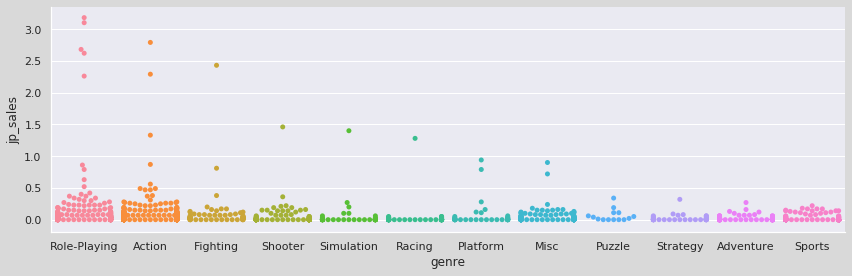

Самые популярные 5 игр по: genre для jp_sales
-----------------------------------------------
                  mean   median    count      sum
              jp_sales jp_sales jp_sales jp_sales
genre                                            
Role-Playing  0.140995     0.05      221    31.16
Action        0.047787     0.01      619    29.58
Fighting      0.106167     0.03       60     6.37
Misc          0.049646     0.01      113     5.61
Shooter       0.038047     0.00      128     4.87
Adventure     0.019459     0.01      185     3.60
Sports        0.020248     0.00      161     3.26
Platform      0.070789     0.00       38     2.69
Simulation    0.052500     0.00       44     2.31
Racing        0.025507     0.00       69     1.76
Strategy      0.025676     0.00       37     0.95
Puzzle        0.066429     0.03       14     0.93


----------------------------------------------------------------------------------------------------




In [101]:
reg_popular_genres = [('genre', 'na_sales'), ('genre', 'eu_sales'), ('genre', 'jp_sales')]
for pair in reg_popular_genres:
    list_popular(*pair)

На японском рынке шутеры не знанимают лидирующие позиции. Любовь к role-playing, вот что отличает японский рынок. Так же значительна доля "разного"). Если судить по распределнию на графике: 

Северная Америка: action, shooter, sports, role-playing, misc

Европа: action, shooter, sports, role-playing, racing

Япония: role-playing, action, misc, fighting , shooter, sports

### 04.03. Влияние рейтинга ESRB на продажи в отдельном регионе

Распределение:  rating по na_sales


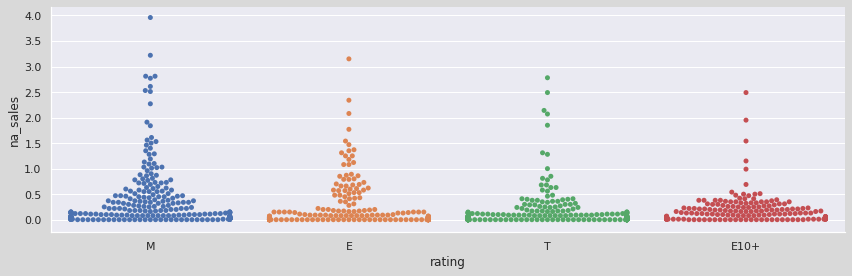

Самые популярные 5 игр по: rating для na_sales
-----------------------------------------------
            mean   median    count      sum
        na_sales na_sales na_sales na_sales
rating                                     
M       0.363849     0.12      265    96.42
E       0.231689     0.05      219    50.74
T       0.143727     0.03      271    38.95
E10+    0.179622     0.10      185    33.23


----------------------------------------------------------------------------------------------------


Распределение:  rating по eu_sales


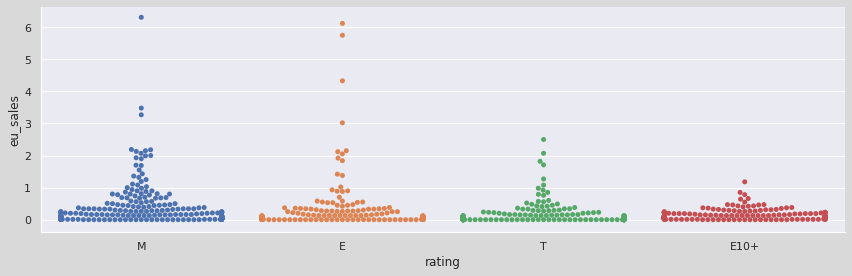

Самые популярные 5 игр по: rating для eu_sales
-----------------------------------------------
            mean   median    count      sum
        eu_sales eu_sales eu_sales eu_sales
rating                                     
M       0.352604     0.12      265    93.44
E       0.265114     0.05      219    58.06
T       0.125720     0.04      271    34.07
E10+    0.141405     0.09      185    26.16


----------------------------------------------------------------------------------------------------


Распределение:  rating по jp_sales


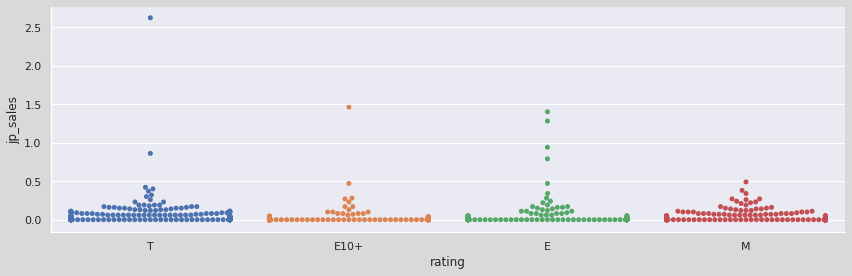

Самые популярные 5 игр по: rating для jp_sales
-----------------------------------------------
            mean   median    count      sum
        jp_sales jp_sales jp_sales jp_sales
rating                                     
T       0.054539     0.01      271    14.78
E       0.040822     0.00      219     8.94
M       0.030226     0.00      265     8.01
E10+    0.024108     0.00      185     4.46


----------------------------------------------------------------------------------------------------




In [82]:
raitings = [('rating', 'na_sales'), ('rating', 'eu_sales'), ('rating', 'jp_sales')]
for pair in raitings:
    list_popular(*pair)

Популярные рейтинги:
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

В Японии популярны игры сегмента для подростков. Далее, для всех и для взрослых.
На европейском и североамериканском рынках преобладают игры категори "M", потом для всех, и для всех от 10 лет.

## 05. Провести исследование статистических показателей
Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? 
- Посчитать: среднее количество, дисперсию, стандартное отклонение. 
- Построить гистограммы. 
- Описать распределения.

In [116]:
def list_popular_stat(parametr, genre):
    print('Распределение: ', parametr, 'по', genre )
    g = (sns.catplot(y=parametr, x=genre, kind="swarm", height=4, aspect=3,
                     data=actual_games.sort_values(by=parametr, ascending=False)))
    (g.set_axis_labels(genre, parametr).set_titles('Title'))
    plt.show()

    print('Статистический отчет:', parametr, 'для', genre )
    print('-'*110)
     
    print(actual_games
     .pivot_table(index=genre, values=parametr,
                  aggfunc=['mean', 'median', 'var', 'std'])
     .sort_values(by=('median', parametr), ascending=False))
    print('')
    print('')
    print('-'*110)
    print('')
    print('')

Распределение:  user_score по genre


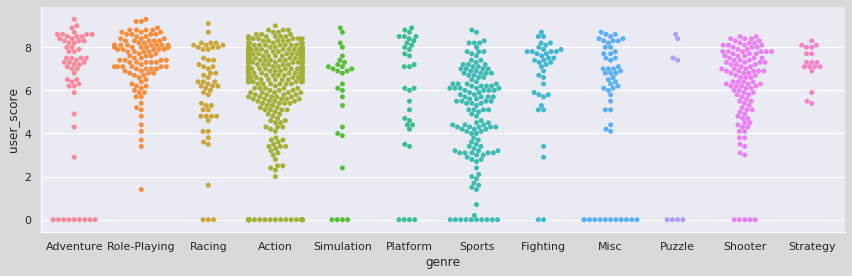

Статистический отчет: user_score для genre
--------------------------------------------------------------------------------------------------------------
                   mean     median        var        std
             user_score user_score user_score user_score
genre                                                   
Role-Playing   7.348571       7.60   1.735984   1.317567
Fighting       6.625641       7.40   4.157746   2.039055
Adventure      6.269643       7.35   8.977789   2.996296
Strategy       7.216667       7.30   0.740294   0.860403
Platform       5.924242       7.10   7.794394   2.791844
Simulation     5.575000       6.85   7.509352   2.740320
Action         5.958160       6.80   6.467798   2.543187
Shooter        6.259292       6.80   3.654757   1.911742
Misc           5.390566       6.60   9.889717   3.144792
Racing         5.975926       6.35   4.525636   2.127354
Sports         4.843796       5.40   5.054538   2.248230
Puzzle         3.987500       3.70  18.332679   

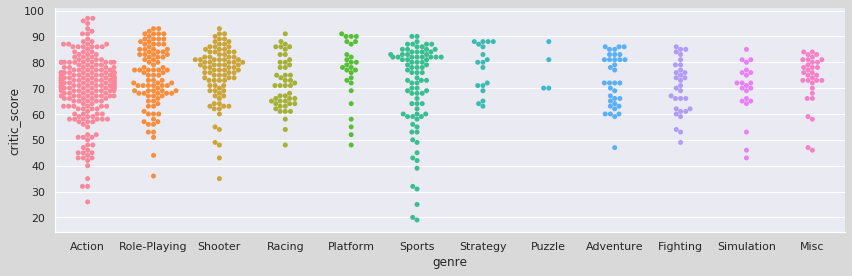

Статистический отчет: critic_score для genre
--------------------------------------------------------------------------------------------------------------
                     mean       median          var          std
             critic_score critic_score critic_score critic_score
genre                                                           
Strategy        77.888889         80.0    81.869281     9.048165
Platform        76.296296         78.0   143.370370    11.973737
Shooter         75.539326         78.0   118.251277    10.874340
Misc            73.606061         76.0    91.058712     9.542469
Sports          70.214286         76.0   283.905336    16.849491
Puzzle          77.250000         75.5    78.250000     8.845903
Role-Playing    74.525773         75.0   137.856100    11.741214
Action          70.298701         72.0   147.306042    12.136970
Adventure       72.714286         72.0   102.857143    10.141851
Simulation      69.500000         71.5   115.119048    10.729354

In [117]:
score_genre_plot = [('user_score', 'genre'), ('critic_score', 'genre')]
for pair in score_genre_plot:
    list_popular_stat(*pair)

Самый оцениваемый жанр - action, наименее оцениваемый puzzle.

## 06. Проверить гипотезы

### 05.01. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Чтобы проверить, различаются ли рейтинги проведем тест, приняв за нулевую гипотезу, гипотезу о равенстве, то есть: 

Пользовательские рейтинги для платформ Xbox One и PC одинаковые. 

Альтернативная гипотеза -- эти рейтинги отличаются. 

Возьмем выборку с того, периода, котрый считаем актуальным, с 2014 года.

In [88]:
actual_games.pivot_table(index='platform', values='user_score', aggfunc=['median', 'mean', 'std'])

,median,mean,std
,user_score,user_score,user_score
platform,,,
3DS,6.8,5.165789,3.457226
PC,6.8,6.050394,2.073218
PS3,5.9,4.911667,2.874144
PS4,7.1,6.662903,1.736345
PSV,7.8,6.986250,2.418481
Wii,0.0,1.411111,2.981797
WiiU,7.0,6.418868,2.491297
X360,5.7,5.206522,2.367583


Посмотрим на распределение рейтингов

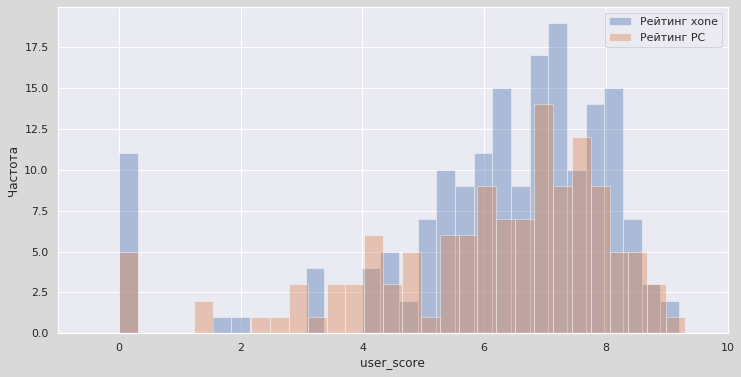

In [89]:
new_xone = actual_games.query('platform == "XOne"')['user_score'].dropna()
new_pc = actual_games.query('platform == "PC"')['user_score'].dropna()

def hist_comparer(data1, data2, limit, bin_q, label1, label2):
    plt.figure(figsize=(12,6))
    ax = (sns.distplot(data1,
               bins=bin_q, kde=False, label=label1))
    (sns.distplot(data2,
               bins=bin_q, label=label2, kde=False, ax=ax))
    ax.set(ylabel='Частота')
    plt.xlim(limit)
    plt.legend()
    
hist_comparer(new_xone, new_pc, (-1, 10), 30, 'Рейтинг xone', 'Рейтинг PC')

У XOne и PC довольно близкий медианный рейтинг и отклонение. Проведем t-test, примем уровень значимости 0.05

In [90]:
xone_pc = (st.ttest_ind(new_xone, new_pc))
xone_pc.pvalue

0.5858355856278792

p-value больше критического уровня значимости, значит мы принимаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### 05.02. Средние пользовательские рейтинги жанров Action  и Sports разные.
Для проведения теста примем за нулевую гипотезу гипотезу о равенстве: Средние пользовательские рейтинги жанров Action  и Sports равны. Возьмем уровень значимости 0.05

In [92]:
actual_games.pivot_table(index='genre', values='user_score', aggfunc=['median', 'mean', 'std'])

,median,mean,std
,user_score,user_score,user_score
genre,,,
Action,6.80,5.958160,2.543187
Adventure,7.35,6.269643,2.996296
Fighting,7.40,6.625641,2.039055
Misc,6.60,5.390566,3.144792
Platform,7.10,5.924242,2.791844
Puzzle,3.70,3.987500,4.281668
Racing,6.35,5.975926,2.127354
Role-Playing,7.60,7.348571,1.317567


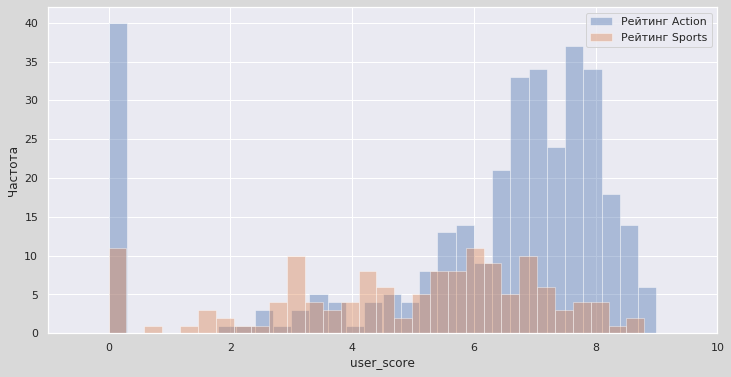

In [93]:
new_action = actual_games.query('genre == "Action"')['user_score'].dropna()
new_sports = actual_games.query('genre == "Sports"')['user_score'].dropna()
    
hist_comparer(new_action, new_sports, (-1, 10), 30, 'Рейтинг Action', 'Рейтинг Sports')

Распределения визуально отличаются, однако отклонение у рейтингов спорта и экшена похоже.

In [94]:
action_sports = (st.ttest_ind(new_action, new_sports))
action_sports.pvalue

9.92015750638991e-06

Нулевую гипотезу отвергаем, значит средние пользовательские рейтинги жанров Action и Sports разные

## 07. Выводы

Целью исследования было спрогонозировать потенцияльно популярный продукт на 2017 год, для интеренет магазина, продающего компьютерные игры по всему миру.  
В первую очередь нужно отметить, что глобальный рынок платформенных компьютерных игр, находится на 2016 год в стостоянии, когда прежде популярные платформы уже пережили свой пик, продажи игр на них идут на спад.

По примеру предыдущих периодов, это, возможно, то время, когда появятся новые платформы. Что-то придет на замену ps4, нинтендо 3ds и xbox one. От этих проихзводителей стоит ждать новых выпусков.  

И так, пока что лидирующие платформы: ps4 (пожалуй, самый крупный игрок), 3ds, xone. Распределение продаж по этим платформам имеет инетересную особенность: как правило существует большое количество игр, котрые не приносят много продаж. Но есть "звезды", у которых продажи одной игры могут достигать 14 миллионов. магазину стоит сосрежоточиться на таких популярных выпусках. Следить за анонсами, возможно выйдет очередная вариация call of duty)

На продажи игр в популярных платформах не оказывает влияние рейтинг пользователей, да и с рейтингом критиков слабая, но полодительная корреляция.
В распределении жанров по глобальному рынку лидируют шутеры и экшен. Причем в среднем стоимость шутера больше, а производство экшенов гораздобольше по количеству.

Что касается распределения по регионам, то как и ожидалось в Японии приобладает платформа Нинтендо, в Европе и Америке ps4. Так что, строя прогнозы на 2017 год регионально, для Японии следует следить за платформой ее производства. Та же в Европе и Америке популярен xbox.  
В жанрах на японском рынке лидирует role-playing, на Нинтендо как раз выпускаются игры такого жанра: pockemon, fallout 4. Гораздо меньше популярны шутеры. На европейском и американском рынке превалируют шутеры и экшн. В Европе следует уделить внимание еще и жанру sports.  

Согласно распределению по возрастному рейтингу для Японии стоит выбирать role-playing игры с рейтингом для подростков, в Америке и Европе экшнн, шутеры категории M и sports категории для всех.
